Problem statement.

Build a recommender system by using cosine simillarties score.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read the data

In [3]:
book=pd.read_csv('book.csv')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
book=book.iloc[:,1:4]

In [5]:
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
book.rename(columns={'User.ID':'USER_ID','Book.Title':'BOOK_TITLE','Book.Rating':'BOOK_RATING'},inplace=True)

In [7]:
book

,USER_ID,BOOK_TITLE,BOOK_RATING
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [9]:
book.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
book[book.duplicated()]

,USER_ID,BOOK_TITLE,BOOK_RATING
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [13]:
book.drop_duplicates(inplace=True)

In [14]:
book[book.duplicated()]

,USER_ID,BOOK_TITLE,BOOK_RATING


In [15]:
book.isnull()

,USER_ID,BOOK_TITLE,BOOK_RATING
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [16]:
book.isnull().sum()

USER_ID        0
BOOK_TITLE     0
BOOK_RATING    0
dtype: int64

<Axes: >

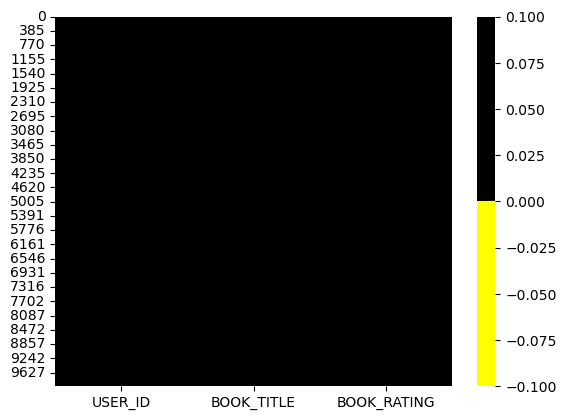

In [25]:
color=['yellow','k']
pal=sns.color_palette (color)
sns.heatmap(data=book.isnull(),cmap=pal)

In [32]:
book.corr()

,USER_ID,BOOK_RATING
USER_ID,1.000000,-0.041574
BOOK_RATING,-0.041574,1.000000


<Axes: >

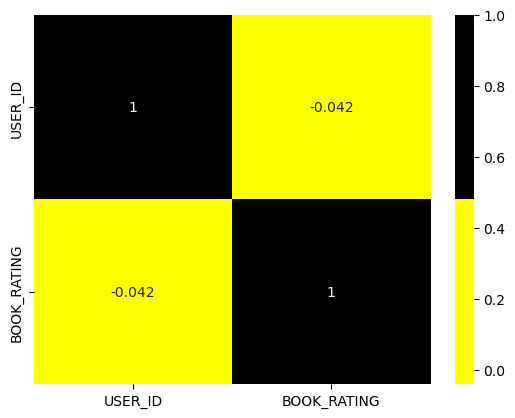

In [33]:
color=['yellow','k']
pal=sns.color_palette (color)
sns.heatmap(data=book.corr(),cmap=pal,annot=True)

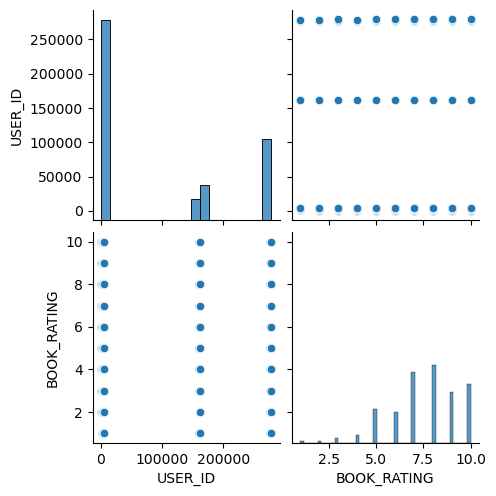

In [30]:
sns.pairplot(data=book)

<Axes: >

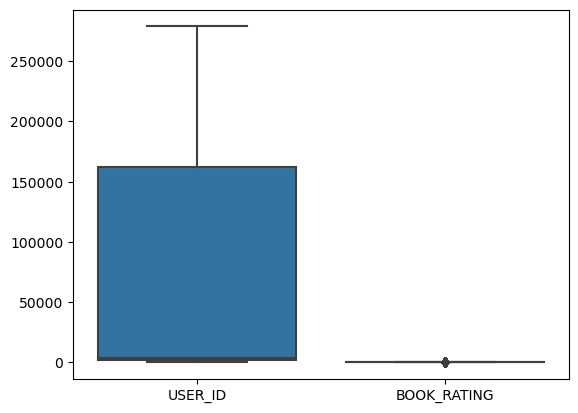

In [34]:
sns.boxplot(data=book)

In [37]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   USER_ID      9998 non-null   int64 
 1   BOOK_TITLE   9998 non-null   object
 2   BOOK_RATING  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.4+ KB


In [38]:
book.describe()

,USER_ID,BOOK_RATING
count,9998.000000,9998.000000
mean,95339.726845,7.566413
std,117650.215490,1.821685
min,8.000000,1.000000
25%,2103.000000,7.000000
50%,3757.000000,8.000000
75%,162052.000000,9.000000
max,278854.000000,10.000000


# unique Book_Title

In [40]:
book['BOOK_TITLE'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [41]:
len(book['BOOK_TITLE'].unique())

9659

# unique user id

In [43]:
book['USER_ID'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [44]:
len(book['USER_ID'].unique())

2182

# which book have the highest rating ?

In [46]:
avg_ratings=book.groupby('BOOK_TITLE').agg('mean')['BOOK_RATING'].sort_values(ascending=False)
avg_ratings

BOOK_TITLE
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
                                                                                                                      ... 
Buster Midnight's Cafe                                                                                                 1.0
Fatal Care                                                                                                             1.0
The S

<Axes: title={'center': 'Highest Rated book'}, xlabel='BOOK_TITLE'>

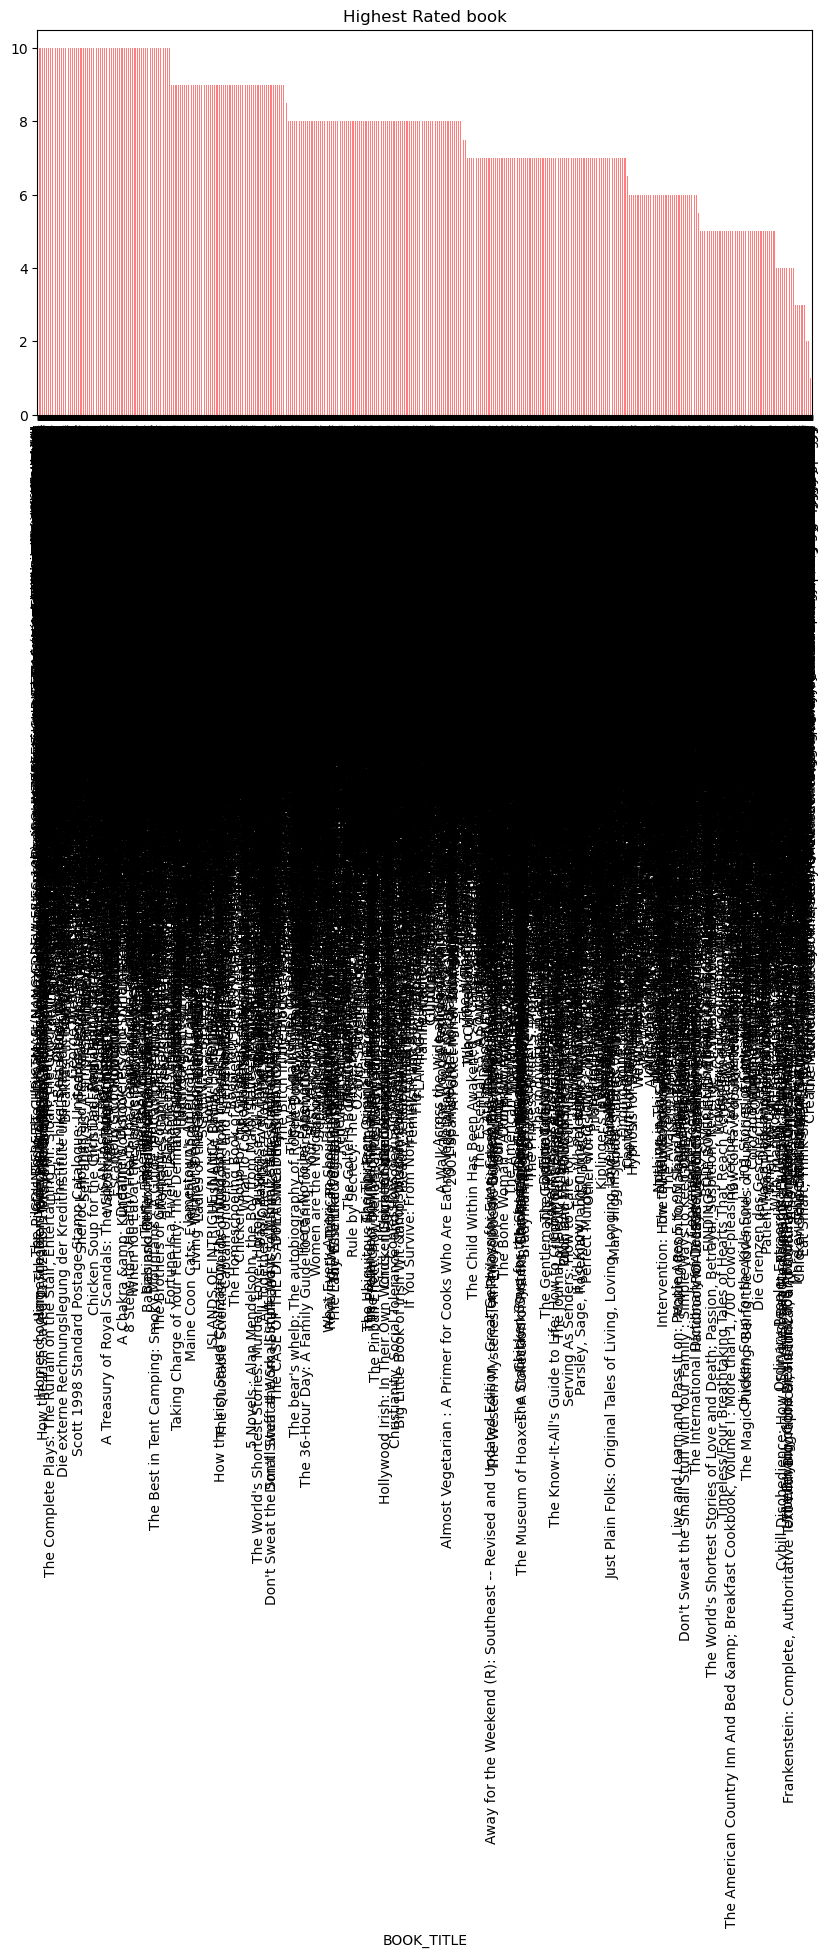

In [47]:
avg_ratings.plot(kind='bar',figsize=(10,5),color='red',alpha=0.5,title='Highest Rated book')

# most watched books

In [49]:
popular_book=book.groupby('BOOK_TITLE').agg('count')['BOOK_RATING'].sort_values(ascending=False)
popular_book

BOOK_TITLE
Fahrenheit 451                                                            5
Vanished                                                                  4
Stardust                                                                  4
Ender's Game (Ender Wiggins Saga (Paperback))                             4
The Subtle Knife (His Dark Materials, Book 2)                             4
                                                                         ..
His-And-Hers Twins (Harlequin American Romance, No. 820)                  1
Histoires Extraordinaires                                                 1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos)    1
Historical Whodunits                                                      1
Ã?Â?bermorgen.                                                            1
Name: BOOK_RATING, Length: 9659, dtype: int64

<Axes: title={'center': 'Most watched books'}, ylabel='BOOK_TITLE'>

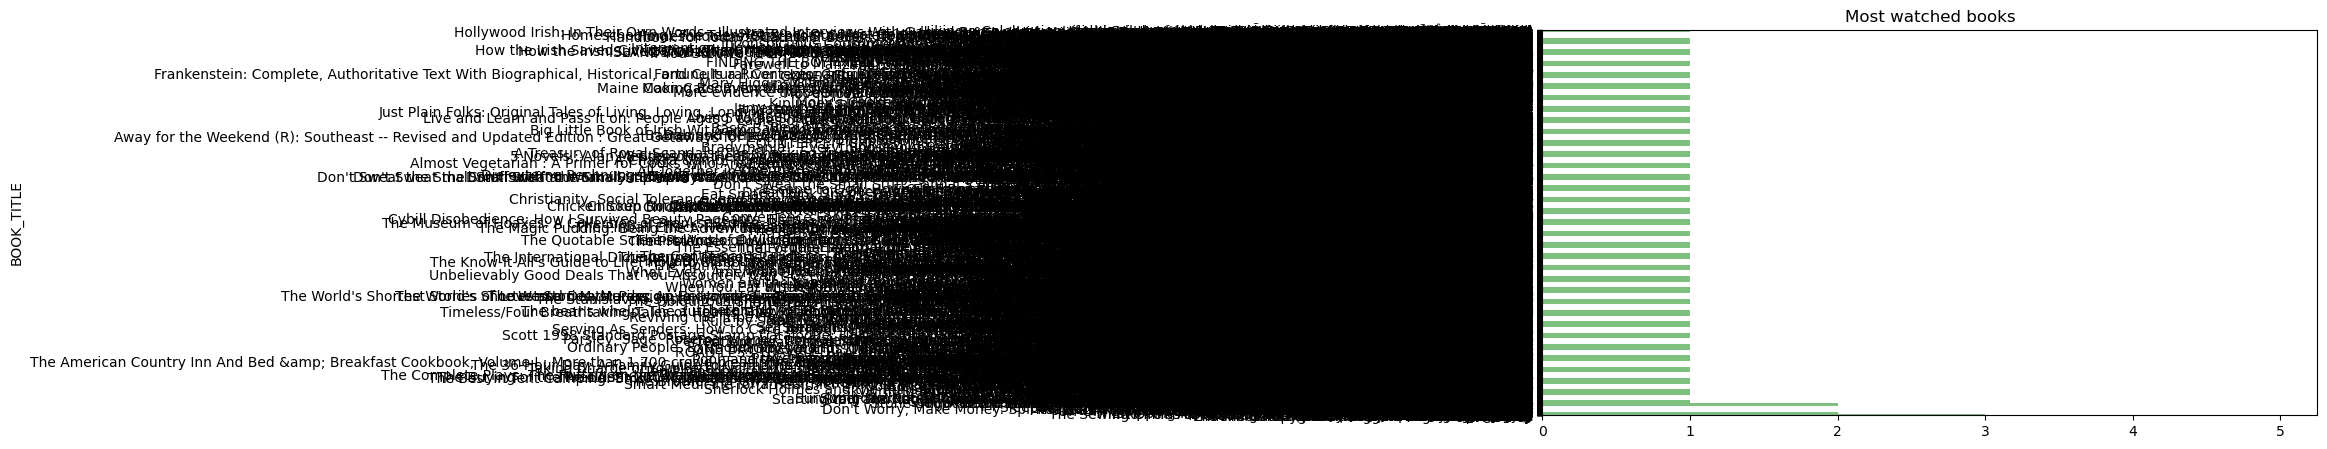

In [50]:
popular_book.plot(kind='barh',figsize=(10,5),color='green',alpha=0.5,title='Most watched books' )

# rating count

In [52]:
rating_count=book['BOOK_RATING'].value_counts()
rating_count

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BOOK_RATING, dtype: int64

<Axes: title={'center': 'Rating counts'}, xlabel='Rating', ylabel='counts'>

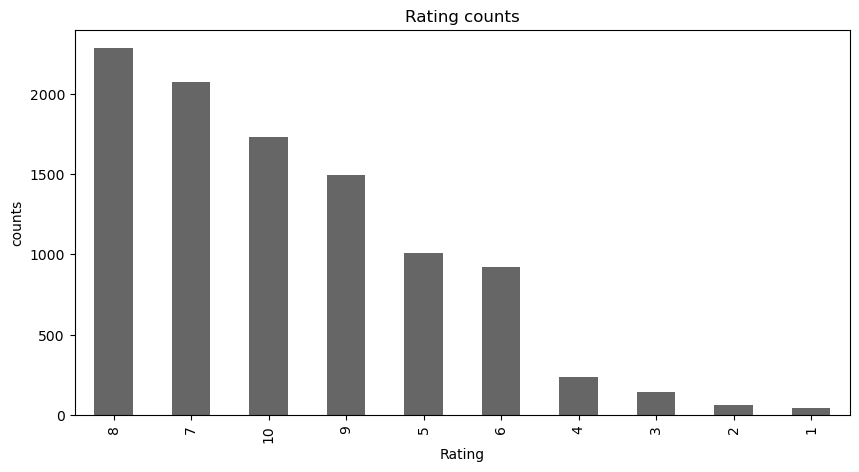

In [53]:
rating_count.plot(kind='bar',color='k',alpha=0.6,title='Rating counts',figsize=(10,5),xlabel='Rating',ylabel='counts')

In [54]:
user_book_matrix=pd.pivot_table(data=book,columns='BOOK_TITLE',index='USER_ID',values='BOOK_RATING')
user_book_matrix

BOOK_TITLE,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
USER_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [55]:
user_book_matrix.fillna(0,inplace=True)

In [56]:
user_book_matrix

BOOK_TITLE,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
USER_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [57]:
from sklearn.metrics.pairwise import cosine_similarity


In [58]:
user_sim_mat=cosine_similarity(user_book_matrix)
user_sim_mat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [59]:
np.fill_diagonal(user_sim_mat,0)
user_sim_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
user_sim_df=pd.DataFrame(user_sim_mat,columns=book['USER_ID'].unique(),index=book['USER_ID'].unique())
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# make recommendation for userid=162109

In [70]:
USER_ID=162129

In [71]:
user_sim_df.loc[USER_ID]

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
         ... 
162107    0.0
162109    0.0
162113    0.0
162121    0.0
162129    0.0
Name: 162129, Length: 2182, dtype: float64

# 3 user who are most similar to userid 162129

In [73]:
sim_users=user_sim_df.loc[USER_ID].sort_values(ascending=False)[:3]
sim_users

276726    0.0
3003      0.0
2983      0.0
Name: 162129, dtype: float64

In [74]:
sim_users.index

Int64Index([276726, 3003, 2983], dtype='int64')

# Get the ratings given by the similar users for all the books

In [76]:
sim_user_ratings=user_book_matrix.loc[sim_users.index]

In [77]:
sim_user_ratings.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
sim_user_ratings.values.argsort()

array([[   0, 6435, 6436, ..., 3223, 9658, 1443],
       [   0, 6433, 6434, ..., 9658, 6858, 8346],
       [   0, 6435, 6436, ..., 3215, 9658,  180]], dtype=int64)

In [79]:
ordered_ratings=user_book_matrix.loc[sim_users.index].values.argsort()[:,-1]
ordered_ratings

array([1443, 8346,  180], dtype=int64)

In [80]:
sim_user_ratings.columns

Index([' Jason, Madison &amp', ' Other Stories;Merril;1985;McClelland &amp',
       ' Repairing PC Drives &amp', ''48',
       ''O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities',
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '01-01-00: A Novel of the Millennium',
       '1,401 More Things That P*Ss Me Off', '10 Commandments Of Dating',
       '100 Great Fantasy Short, Short Stories',
       ...
       'Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)',
       '\Even Monkeys Fall from Trees\ and Other Japanese Proverbs',
       '\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment',
       '\More More More,\ Said the Baby', '\O\ Is for Outlaw',
       '\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character',
       '\Well, there's your problem\: Cartoons', 'iI Paradiso Degli Orchi',
       'stardust', 'Ã?Â?bermorgen.'],
      dtype='object', name='BOOK_TITLE', length=9659)

In [81]:
sim_user_ratings.columns[ordered_ratings]

Index(['Classical Mythology', 'The Seventh Night', 'A Man of Steel'], dtype='object', name='BOOK_TITLE')

# Item similarity

In [83]:
user_book_matrix=user_book_matrix.T
user_book_matrix

USER_ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
BOOK_TITLE,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [84]:
from sklearn.metrics.pairwise import cosine_similarity

In [85]:
user_sim_mat=cosine_similarity(user_book_matrix)
user_sim_mat

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [86]:
np.fill_diagonal(user_sim_mat,0)
user_sim_mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
user_sim_df=pd.DataFrame(user_sim_mat,columns=book['BOOK_TITLE'].unique(),index=book['BOOK_TITLE'].unique())
user_sim_df

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cannibal In Manhattan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Flirt: A Practical Guide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# make recommendation for book=Twilight

In [100]:
BOOK_TITLE=5

In [ ]:
# user_sim_df.iloc['BOOK_TITLE']

In [102]:
sim_users=user_sim_df.iloc[BOOK_TITLE].sort_values(ascending=False)[:3]
sim_users

Kids Say the Darndest Things            1.0
The Key to Rebecca                      1.0
Runaway Pony (Pony Pals (Paperback))    1.0
Name: The Kitchen God's Wife, dtype: float64

In [103]:
sim_users.index

Index(['Kids Say the Darndest Things', 'The Key to Rebecca',
       'Runaway Pony (Pony Pals (Paperback))'],
      dtype='object')

# Get the ratings given by the similar movie for all the books

In [105]:
sim_user_ratings=user_book_matrix.loc[sim_users.index]

In [106]:
sim_user_ratings.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
sim_user_ratings.values.argsort()

array([[   0, 1462, 1461, ...,  724, 2181, 1556],
       [   0, 1463, 1462, ...,  724, 2181,   19],
       [   0, 1463, 1462, ...,  732, 2181, 1106]], dtype=int64)

In [108]:
ordered_ratings=user_book_matrix.loc[sim_users.index].values.argsort()[:,-1]
ordered_ratings

array([1556,   19, 1106], dtype=int64)

In [109]:
sim_user_ratings.columns

Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='USER_ID', length=2182)

In [110]:
sim_user_ratings.columns[ordered_ratings]

Int64Index([162129, 69, 3965], dtype='int64', name='USER_ID')